# Problem Sheet 2

## Some experiments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [24]:
%config InlineBackend.figure_format = "retina"

In problem 5, we are asked to compute the parameter $\boldsymbol\beta$ that minimizes the **weighted** sum of squared errors.

In [25]:
N, M = 100, 6
w = np.random.rand(N)
beta = np.random.rand(M, 1)
#x = np.linspace(0, 5, N) + np.random.rand() / 20
Phi = np.random.randn(N, M)
y = Phi @ beta + np.random.randn(N, 1)

$$
    S = \frac{1}{2}\sum_{n=1}^N w_n(y_n - \boldsymbol\beta^T \boldsymbol\phi_n)^2
$$

In [26]:
S1 = w * (y[:, 0] - np.einsum("mi,nm->n", beta, Phi)) ** 2 / 2
S1.sum()

28.00435622886984

$$
    S = \frac{1}{2}({\bf y} - \boldsymbol\Phi\boldsymbol\beta)^T{\bf W}({\bf y} - \boldsymbol\Phi\boldsymbol\beta)
$$

Where
* ${\bf W} = \text{diag}(w_1, \ldots, w_N)$

In [27]:
W = np.diag(w)

In [28]:
diff = y - Phi @ beta
S2 = diff.T @ W @ diff / 2
S2.item()

28.004356228869845

### Intermediate computations

In [29]:
r1 = Phi.T @ W @ y
r1

array([[62.96084491],
       [-1.44217289],
       [44.9039809 ],
       [32.66961384],
       [18.61533596],
       [27.6179918 ]])

In [30]:
((w * y[:, 0])[:, None] * Phi).sum(axis=0)

array([62.96084491, -1.44217289, 44.9039809 , 32.66961384, 18.61533596,
       27.6179918 ])

$$
\boldsymbol\beta^* = \left(\Phi^T{\bf W}\Phi\right)^{-1}\Phi^T{\bf W}{\bf y}
$$

In [31]:
inv(Phi.T @ W @ Phi) @ Phi.T @ W @ y

array([[0.88101488],
       [0.45536478],
       [0.89321611],
       [0.5515802 ],
       [0.30955359],
       [0.60418178]])

## Problem 6

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [33]:
x = np.array([0, 1, 3, 3.25, 3.5, 5])[:, None]
y = np.array([-1, 1, 2.5, 4, 3, 3])

In [34]:
pf = PolynomialFeatures(degree=1, include_bias=True)

In [39]:
def poly_reg(degree):
    pipe = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lr", LinearRegression())
    ])
    return pipe

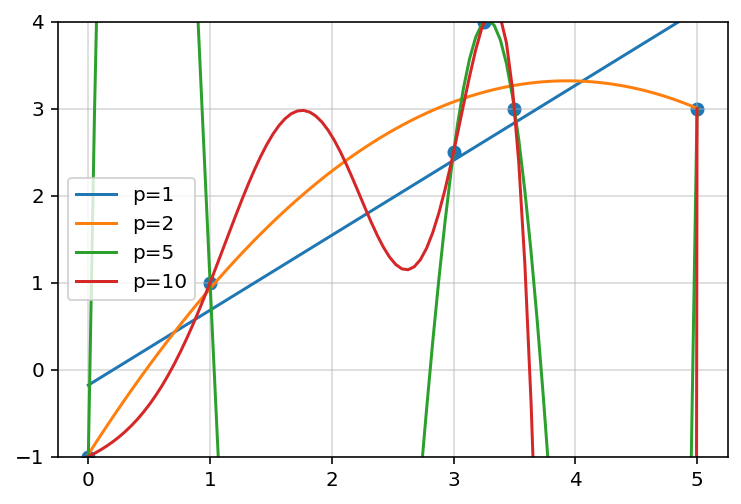

In [56]:
degrees = [1, 2, 5, 10]

xrange = np.linspace(0, 5, 100)[:, None]
plt.scatter(x, y)
for degree in degrees:
    model = poly_reg(degree).fit(x, y)
    yhat = model.predict(xrange)
    plt.plot(xrange, yhat, label=f"p={degree}")
plt.legend()
plt.ylim(y.min(), y.max())
plt.grid(alpha=0.5)